# Basics but no standard image processing

In [1]:

from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
from sklearn.cluster import KMeans
import seaborn as sns
from numpy import linalg as la
from math import floor

def roundup(number):
    return round(number+.5)

In [24]:
#show whats on the current directory
os.listdir()

['text_processing.ipynb',
 '.DS_Store',
 '.ipynb_checkpoints',
 'IMG_9992.JPG',
 '.git',
 'imageProcessing.ipynb']

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


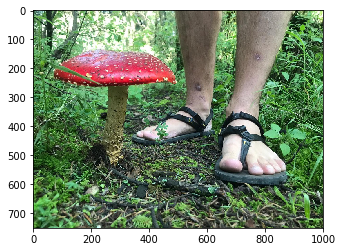

In [3]:
img=misc.imread('C712DD03-E345-459E-928F-A9949A247E75-1000.jpg')
plt.imshow(img)

In [4]:
# get some important details, sizex, sisey.
ysize=img.shape[0]
xsize=img.shape[1]
print(f'ysize: {ysize} and xsize {xsize}')

ysize: 750 and xsize 1000


In [21]:
3812*3

11436

In [213]:
#save image
misc.imsave('cuadros.png', a)

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


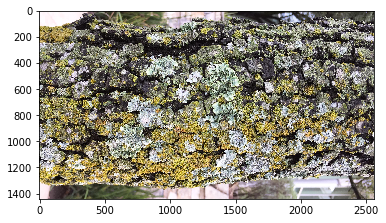

In [6]:
#rotate image and save
rotated = ndimage.rotate(img, -90)
misc.imsave('vuelta.png', rotated)
plt.imshow(rotated, cmap=plt.cm.gray)      

# Slice experiments, try todo the horizontal ones.

In [131]:
def slice_image_r_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((maping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  



In [211]:
img.shape[0]


3456

In [143]:
def slice_image_r_n(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((maping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img


In [134]:
def slice_image_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    new_img=img
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((mapping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  
    return new_img



In [132]:
def slice_image_n(img,slices):
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((mapping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38, 41, 40, 43, 42, 45, 44, 47, 46, 49, 48, 51, 50, 53, 52, 55, 54, 57, 56, 59, 58, 61, 60, 63, 62, 65, 64, 67, 66, 69, 68, 71, 70, 73, 72, 75, 74, 77, 76, 79, 78, 81, 80, 83, 82, 85, 84, 87, 86, 89, 88, 91, 90, 93, 92, 95, 94, 97, 96, 99, 98, 101, 100, 103, 102, 105, 104, 107, 106, 109, 108, 111, 110, 113, 112, 115, 114, 117, 116, 119, 118, 121, 120, 123, 122, 125, 124, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 139, 138, 141, 140, 143, 142, 145, 144, 147, 146, 149, 148, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 161, 160, 163, 162, 165, 164, 167, 166, 169, 168, 171, 170, 173, 172, 175, 174, 177, 176, 179, 178, 181, 180, 183, 182, 185, 184, 187, 186, 189, 188, 191, 190, 193, 192, 195, 194, 197, 196, 199, 198, 201, 200, 203, 202, 205, 204, 207, 206, 209, 208, 211, 210, 213, 212, 215, 214, 217, 216, 219, 218, 221, 220,

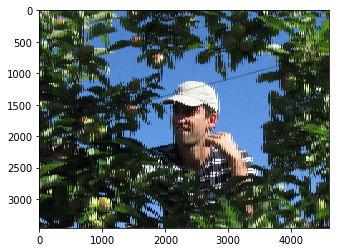

In [232]:
a=slice_image_n(img,int(4608/20))

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38, 41, 40, 43, 42, 45, 44, 47, 46, 49, 48, 51, 50, 53, 52, 55, 54, 57, 56, 59, 58, 61, 60, 63, 62, 65, 64, 67, 66, 69, 68, 71, 70, 73, 72, 75, 74, 77, 76, 79, 78, 81, 80, 83, 82, 85, 84, 87, 86, 89, 88, 91, 90, 93, 92, 95, 94, 97, 96, 99, 98, 101, 100, 103, 102, 105, 104, 107, 106, 109, 108, 111, 110, 113, 112, 115, 114, 117, 116, 119, 118, 121, 120, 123, 122, 125, 124, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 139, 138, 141, 140, 143, 142, 145, 144, 147, 146, 149, 148, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 161, 160, 163, 162, 165, 164, 167, 166, 169, 168, 171, 170]


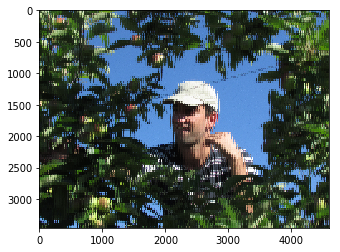

In [233]:
a=slice_image_m(a,int(3456/20))

# Nueva funcion que cada slice la mueve derecha izquierda

# K means n color palette

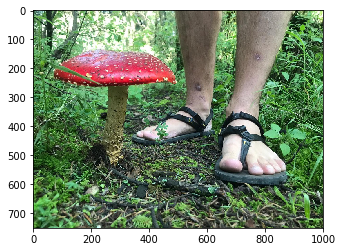

In [20]:
#def color_palette(img,n=4):
n=5
ysize=img.shape[0]
xsize=img.shape[1]
new_img=np.reshape(img,(xsize*ysize,3))
model=KMeans(n_clusters=n,random_state=42).fit(new_img)#verbose=1
#sns.palplot(colors)
plt.imshow(img, cmap=plt.cm.gray) 
#return model

## colores

(750000, 3)
[[ 33.02487581  54.90582598  30.19327871]
 [217.60510861 219.99061562 204.84127229]
 [ 82.65903332 109.48534062  73.25022749]
 [135.75001655 170.68948925 127.02228733]
 [210.43977994  80.03364367  99.80715193]]


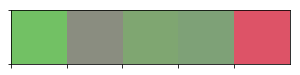

In [23]:
colors=[]
print(new_img.shape)
for i in range(n):
    colors.append(np.median(new_img[model.labels_==i],axis=0))
    colors[i]=colors[i]/sum(colors[i])
    #new_img[model.labels_==i]=colors[i]
colors=np.array(colors)*1.6
sns.palplot(colors)
print(model.cluster_centers_)

In [10]:
# clusters from image.
new_img=np.reshape()
for i in range(n):
    slicer=model.labels_==i
    print(slicer.sum())
    print(new_img[slicer].shape)
    print(np.full((slicer.sum(),3), colors[i]).shape)
    
new_img=np.reshape(new_img,(ysize,xsize,3))
plt.imshow(new_img, cmap=plt.cm.gray) 



1059576


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2561 but corresponding boolean dimension is 3687840

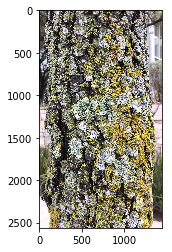

In [11]:
plt.imshow(new_img, cmap=plt.cm.gray) 



In [8]:
img=rotated

In [50]:
type(img[0,0,0])

numpy.uint8

# cut in squares a panoramic image.


0
3812
(3812, 3812, 3)
3812
7624
(3812, 3812, 3)
(3812, 3812, 3)


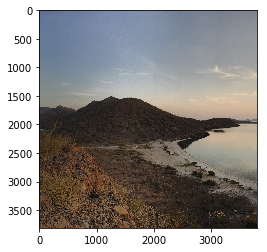

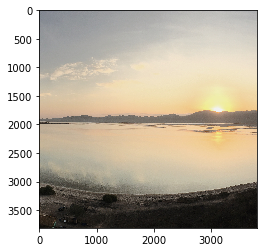

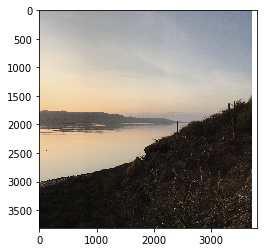

In [66]:
for i in range(floor(xsize/ysize)):
    new_img=np.ndarray(shape=(ysize,ysize,3), dtype=int, order='F')
    print(i*ysize)
    print((i+1)*ysize)
    slicer=(slice(0, ysize, 1), slice(i*ysize,(i+1)*ysize, 1), slice(0, 3, 1))
    new_img=img[slicer]
    plt.figure(i)
    plt.imshow(new_img, cmap=plt.cm.gray)
    print(img[slicer].shape)


new_img=np.ones((ysize,ysize,3),dtype=int)*255
slicer1=(slice(0, ysize, 1), slice((i+1)*ysize,xsize, 1), slice(0, 3, 1))
slicer2=(slice(0, ysize, 1), slice(0,xsize%ysize, 1), slice(0, 3, 1))

print(new_img.shape)
new_img[slicer2]=img[slicer1]
plt.figure(i+1)
plt.imshow(new_img, cmap=plt.cm.gray)


In [61]:
array=np.array([0,1,2,3,4,5,6])

In [64]:
array[0:2]


array([0, 1])

In [65]:
array[2:4]

array([2, 3])